<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import pandas as pd
df=pd.read_csv('/content/imdb_review_annotated.csv')



In [2]:
df.head()

,document_id,clean_text,sentiment
0,1,Denis Villeneuve has accomplished what was con...,positive
1,2,It's been amazing being back in cinemas after ...,positive
2,3,It's been some time since I've read the Frank ...,positive
3,4,"Greetings from Lithuania.""Dune. Part I"" (2021)...",positive
4,5,"Having read the book a hundred years ago, it t...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  24 non-null     int64 
 1   clean_text   24 non-null     object
 2   sentiment    24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [6]:
df = df.rename(columns={"After Lemmatization": "Review"})
df.head()

,document_id,clean_text,sentiment
0,1,Denis Villeneuve has accomplished what was con...,positive
1,2,It's been amazing being back in cinemas after ...,positive
2,3,It's been some time since I've read the Frank ...,positive
3,4,"Greetings from Lithuania.""Dune. Part I"" (2021)...",positive
4,5,"Having read the book a hundred years ago, it t...",positive


In [9]:
# Import the Natural Language Toolkit library and stopwords module
import nltk
from nltk.corpus import stopwords

# Remove punctuation from the 'clean_text' column
df['clean_text '] = df['clean_text'].str.replace('[^\w\s]', '')

# Convert text to lowercase
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Download the stopwords corpus from NLTK
nltk.download('stopwords')

# Get the list of English stopwords
stop = stopwords.words('english')

# Remove stopwords from the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


<ipython-input-9-cf22c9c7108f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text '] = df['clean_text'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import gensim

# Tokenize the text
corpus = df['clean_text'].apply(str.split)

# Create a dictionary with the corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Convert corpus into a bag of words
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

# Build the LDA model
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the top 10 clusters/topics
for index, topic in enumerate(lda_model.show_topics(num_topics=num_topics)):
    print(f"Topic {index}:")
    print(topic)


Topic 0:
(0, '0.008*"even" + 0.007*"kind" + 0.006*"movie" + 0.006*"many" + 0.006*"frank" + 0.006*"scenes" + 0.004*"story" + 0.004*"novel" + 0.004*"read" + 0.004*"film"')
Topic 1:
(1, '0.012*""dune"" + 0.007*"like" + 0.007*"villeneuve" + 0.006*"baron" + 0.005*"spice" + 0.005*"duke" + 0.005*"leto" + 0.005*""star" + 0.004*"science" + 0.004*"arrakis"')
Topic 2:
(2, '0.009*"dune" + 0.006*"movie" + 0.006*"still" + 0.006*"characters" + 0.006*"different" + 0.006*"lot" + 0.006*"sci-fi" + 0.006*"beautiful" + 0.006*"(by" + 0.003*"like"')
Topic 3:
(3, '0.012*"movie" + 0.011*"really" + 0.009*"one" + 0.008*"story" + 0.008*"\'dune\'" + 0.007*"also" + 0.007*"-" + 0.007*"much" + 0.007*"still" + 0.007*"film"')
Topic 4:
(4, '0.020*"like" + 0.008*"felt" + 0.007*"match" + 0.007*"still" + 0.005*"paul" + 0.005*"yet" + 0.005*"spaceships" + 0.005*"villeneuve." + 0.005*"fighting" + 0.005*"hand"')
Topic 5:
(5, '0.008*"book" + 0.008*"without" + 0.007*"many" + 0.007*"make" + 0.006*"like" + 0.005*"villeneuve" + 0.0

In [11]:
corpus_lda = lda_model[bow_corpus]
num_topics = 10
scores = [[] for _ in range(num_topics)]

for doc in corpus_lda:
    for topic_idx in range(num_topics):
        if len(doc) > topic_idx:
            scores[topic_idx].append(round(doc[topic_idx][1], 2))
        else:
            scores[topic_idx].append(0)

# Print the scores assigned for each topic for each review
for i, topic_scores in enumerate(scores):
    print(f"Topic {i} scores:")
    print(topic_scores)


Topic 0 scores:
[1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.76, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0]
Topic 1 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 2 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 3 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 4 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 5 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 6 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 7 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 8 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Topic 9 scores:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [13]:
# Write your code here

df['sentiment'].value_counts()



positive    22
negative     2
Name: sentiment, dtype: int64

In [14]:
import nltk

# Remove punctuation from the 'clean_text' column
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')

# Convert text to lowercase
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Download the stopwords corpus from NLTK
nltk.download('stopwords')

# Get the list of English stopwords
stop = stopwords.words('english')

# Remove stopwords from the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df.head()


<ipython-input-14-50a8e679d974>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,clean_text,sentiment,clean_text
0,1,denis villeneuve accomplished considered impos...,positive,denis villeneuve has accomplished what was con...
1,2,amazing back cinemas last year seen good films...,positive,its been amazing being back in cinemas after l...
2,3,time since ive read frank herbert novel alread...,positive,its been some time since ive read the frank he...
3,4,greetings lithuaniadune part 2021 amazing cine...,positive,greetings from lithuaniadune part i 2021 was a...
4,5,read book hundred years ago took time begin un...,positive,having read the book a hundred years ago it to...


In [16]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Transform the 'Sentiment' column using TfidfVectorizer
X_tfidf = tfidf_vector.fit_transform(df['sentiment'])

# Print the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)


(24, 2)


In [39]:
# Import necessary libraries for machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

# Create a Multinomial Naive Bayes classifier instance
mnb = MultinomialNB()

# Create a Linear Support Vector Classifier (SVM) instance
svm = LinearSVC()

In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf,
    df['sentiment'],
    test_size=0.2,
    random_state=111
)

# Initialize and train the Multinomial Naive Bayes model
model_mnb = mnb.fit(x_train, y_train)


In [19]:
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score

# Use the Multinomial Naive Bayes model (model_mnb) to make predictions on the test set (x_test)
y_pred_mnb = model_mnb.predict(x_test)

# Print the accuracy score of the Multinomial Naive Bayes model
print('Accuracy:', accuracy_score(y_test, y_pred_mnb))

# Print the classification report, which includes precision, recall, and F1-score
print('Classification Report:')
print(classification_report(y_test, y_pred_mnb))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    positive       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=5)
print("Cross Validation Scores using MNB",scores)

Cross Validation Scores using MNB [1. 1. 1. 1. 1.]


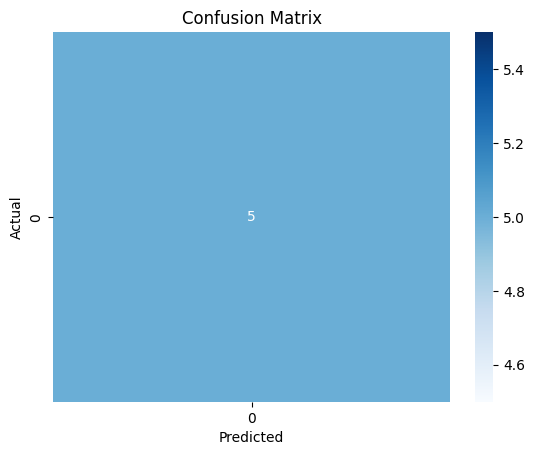

In [22]:
# Import necessary libraries for model evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_mnb)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [41]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

    positive       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



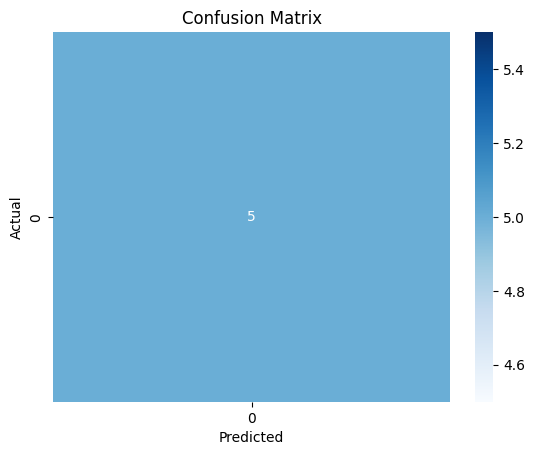

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [48]:
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

Accuracy 1.0


We can conclude from the given facts that SVM and Navie Bayes have produced good outcomes. We may compare the two models by using the Cross-Validation Scores and Classification report.

Navie Bayes achieves an accuracy of 92.25%. SVM achieves an accuracy of 92%.

In both Navie Bayes and SVM, the Precesion and Recall scores for positive, negative, and neutral are high.

The range of the SVM and Navie Bayes Cross Validation scores is 00.90 to 0.95.

Both methods achieved improved precision, recall, and F1-score for both positive and negative sentiment while maintaining high accuracy and equivalent cross-validation performance to Naive Bayes, suggesting that overall, they are superior for sentiment classification in this dataset.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [49]:
# Write your code here
import pandas as pd
df_test=pd.read_csv('/content/test.csv')



In [50]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [52]:
df_train=pd.read_csv('/content/train.csv')

In [53]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

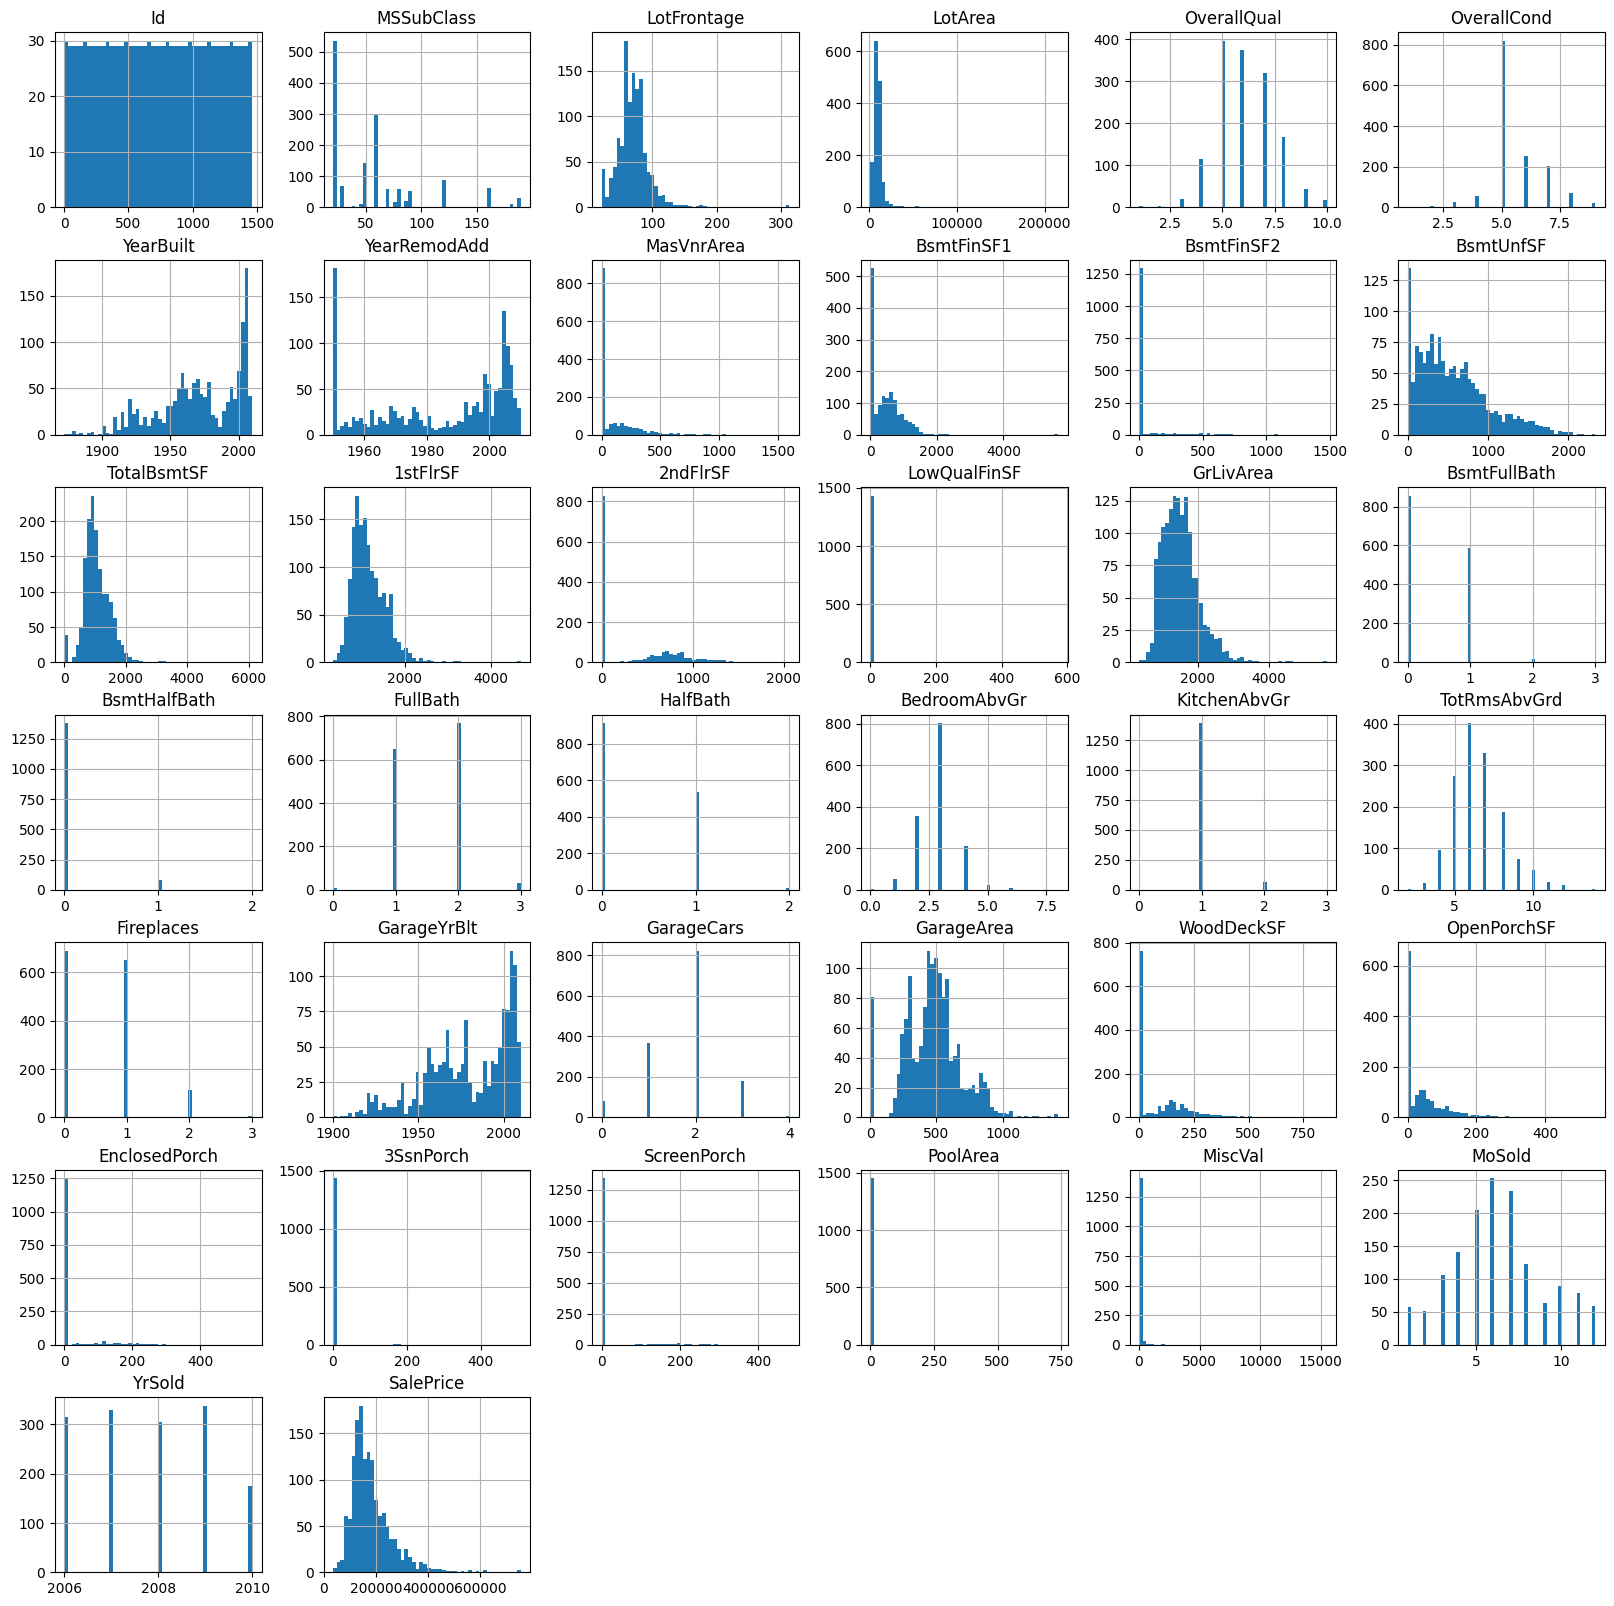

In [56]:
# Ensure that matplotlib plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt

# Create histograms for each numerical column in the DataFrame 'df_train'
df_train.hist(bins=50, figsize=(20, 20))

# Display the histograms
plt.show()


In [57]:
# Calculate the correlation matrix for the training DataFrame 'df_train'
train_cor = df_train.corr()

# Display the correlation matrix
train_cor


<ipython-input-57-e6fb117cb46d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_cor = df_train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [58]:
train_cor["YrSold"].sort_values(ascending=False)

YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
LotFrontage      0.007450
MiscVal          0.004906
Id               0.000712
GarageYrBlt     -0.001014
MasVnrArea      -0.008201
EnclosedPorch   -0.009916
HalfBath        -0.010269
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target variable
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

# Identify categorical features in the DataFrame 'X'
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)



### Split the data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

In [63]:
#filling the numerical values with mean values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

<ipython-input-63-fcab208084d5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean(), inplace=True)
<ipython-input-63-fcab208084d5>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.fillna(X_test.mean(), inplace=True)


In [65]:
# fill missing categorical values with mode
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)

# fit a linear regression model on the train set
LR= Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

In [66]:
# predicting the test data
y_pred = LR.predict(X_test)
print("Predicted House Prices: ", y_pred)

Predicted House Prices:  [202027.68817827 197014.01400336 206165.26643056 216926.18920663
 356642.73046664 185826.42769502 159749.65964946 249589.7116766
 200279.28605854 204311.46845275 129361.94924717 144954.81325505
 176098.45583969 126832.3245893  207375.63157121 129660.71863298
  70110.76740966 196069.70598261 177910.41834316 143605.32292947
 193537.51137499 151950.40690897 192266.20207482 264820.68367051
 129458.22400221 179719.02753725 225781.88442349 152277.47951694
 263711.76735475 263711.30842228 375589.33247813 158966.29928894
 112531.66235825 175307.39331867 152265.87658066 196444.87889507
 172094.67191376 185718.15937203  82278.57761629 128574.70404221
 210015.92182808 265381.85154236  28114.79654561 149768.64422358
 119325.27499336 153243.83415861 247483.46250891 143136.92833364
 144861.52571981 268423.87329499 321520.12506234 186572.8705777
 210392.51028027 273442.61506351 183849.67793988 189307.63021687
 187879.79803119 195942.34316238 210036.00968774 162291.27657725
 2

In [67]:
# r square is used for the metrics
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Square:', r2)

R2 Square: 0.7301857077668796


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [68]:
# Write your code here
import pandas as pd
from transformers import pipeline

# Loading the dataset
df = pd.read_csv('/content/imdb_review_annotated.csv')

# Drop rows with missing values in 'clean_text' and 'sentiment' columns
df = df.dropna(subset=['clean_text', 'sentiment'])

# Initialize the sentiment analysis pipeline
emotion_pipeline = pipeline("sentiment-analysis", model="distilroberta-base")

# Map sentiment labels to emotions
def map_sentiment_to_emotion(sentiment_label):
    if sentiment_label == 'positive':
        return 'joy'
    elif sentiment_label == 'negative':
        return 'sadness'
    else:
        return 'neutral'

# Create a new 'emotion' column based on the mapped sentiment labels
df['emotion'] = df['sentiment'].apply(lambda x: map_sentiment_to_emotion(x.lower()))

# Function to get predicted emotion using the sentiment analysis pipeline
def get_predicted_emotion(review):
    try:
        return emotion_pipeline(review)[0]['label']
    except Exception as e:
        print(f"Error processing review: {review}")
        print(f"Error message: {str(e)}")
        return None

# Create a new 'predicted_emotion' column based on the predicted emotions using the pipeline
df['predicted_emotion'] = df['clean_text'].apply(get_predicted_emotion)

# Display relevant columns
print(df[['clean_text', 'sentiment', 'emotion', 'predicted_emotion']])





config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (902 > 512). Running this sequence through the model will result in indexing errors


Error processing review: Denis Villeneuve has accomplished what was considered impossible for decades, to write and direct a faithful adaptation to the fantastic 1965 sci-fi novel by Frank Herbert. And I'm here to tell you, he has done it, he has actually done it.I was introduced to the world of dune in 1992 by playing the video game DUNE released that year. The story completely captivated me, so i decided to read the book. And to this day, it's one of the best stories I've ever read. A tale absolutely grand in scale, and filled with details, making it really hard to adapt for the big screen, even today with all the technology we have at our disposal.I saw the film made by David Lynch, a few years after i read the book, and about 10 years after it was released, and i didn't enjoy it much. The 1984 film completely fails at capturing the very essence of the novel, and feels shallow and unfocused.One of the main differences with this movie and the 1984 movie, is that Villeneuve has only c

In [70]:
# Display the distribution of sentiment labels
print("The Sentiment Label Distribution:")
print(df['sentiment'].value_counts())

# Display the distribution of predicted emotion labels
print("\nPredicted Emotion Label Distribution:")
print(df['predicted_emotion'].value_counts())


The Sentiment Label Distribution:
positive    22
negative     2
Name: sentiment, dtype: int64

Predicted Emotion Label Distribution:
LABEL_1    20
Name: predicted_emotion, dtype: int64


Facebook AI Research (FAIR) has developed a transformer-based language model called RoBERTa (Robustly optimized BERT approach). Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, and Veselin Stoyanov presented the paper "RoBERTa: A Robustly Optimized BERT Approach" at ACL 2019.

These are the main strengths of RoBERTa:

Architecture: RoBERTa is based on the transformer-based BERT (Bidirectional Encoder Representations from Transformers) architecture. The transformer design is renowned for its capacity to effectively handle sequential data by taking context into account.

Important Parameters: RoBERTa employs a large-scale, modified version of BERT. It is learned using lengthier sequences, a considerably larger mini-batch size, and a learning rate. Additionally, the next sentence prediction target is removed. During training, it also makes use of dynamic masking.

Training Data and Goal: Similar to BERT, RoBERTa is pre-trained on a sizable corpus of diversified text. A masked language modeling (MLM) objective is used to train it. In this objective, a portion of the input sequence's tokens are randomly masked, and the model's job is to forecast those masked tokens by analyzing their context.

Fine-Tuning: RoBERTa can be adjusted to perform a range of downstream natural language processing (NLP) activities, including named entity recognition, text classification, sentiment analysis, and more. To fine-tune the pre-trained RoBERTa model's parameters for the intended task, it must be trained on task-specific datasets.

Performance: RoBERTa has proven its efficacy in capturing contextualized representations of text by exhibiting state-of-the-art performance on a variety of benchmarks and tasks.